<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/FD_operator_with_higher_order_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose that we wish to approximate the first derivative $u'(x)$ of a very smooth function with an error of only $O(h)^4$, where $h$ is the step size. Which difference approximation could we use?

To estimate a smooth function with smallest truncation error, we should use Central Difference Formula:
Choose Central Difference Formula.
$$O(h^4)$$
We can choose $$x-2h,x-h, x, x+h,x+2h\in[a,b]$$
suppose$$f(x)\in C^5[a,b]$$
First:
$$f(x+h)-f(x-h)=2f'(x)h+\frac{2f^3(x)h^3}{3!}+\frac{2f^5(x)h^5}{5!}$$
Second:
$$f(x+2h)-f(x-2h)=4f'(x)h+\frac{16f^3(x)h^3}{3!}+\frac{64f^5(x)h^5}{5!}$$


By elimilation we get :
$$\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}=\frac{(16f^5(c_1)-64f^5(c_2))h^5}{120}+12f'(x)h$$
Since this function is smooth, we can have a c value that satisfied:
$$16f^5(c_1)-64f^5(c_2)=-48f^5(c)$$
So, we have:
$$\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}+\frac{f^5(c)h^4}{30}+=f'(x)$$
Also, for Central Difference Formula:
$$f'(x)\approx\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}$$
$$f'(x)=\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}+E_{Truncation}$$
So, we have:
$$E_{Truncation}=\frac{f^5(c)h^4}{30}$$
which is O(h^4)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def sfd(f, x, h):
  return(-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h))/(12*h)
    # your input here;

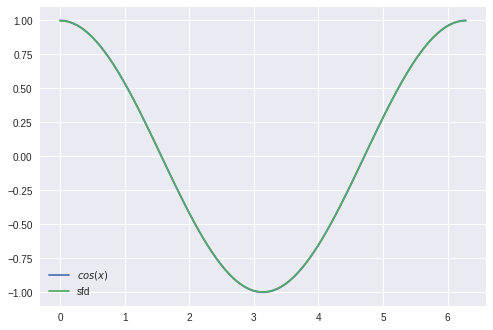

In [7]:
h = .5
x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, np.cos(x_co), label = '$cos(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

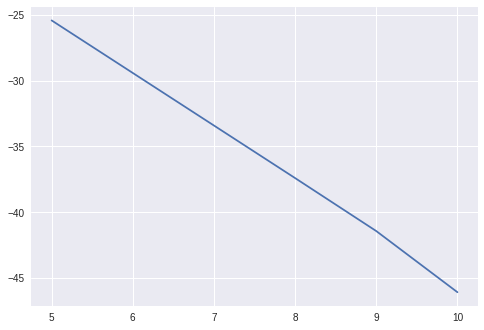

In [19]:
x_target = np.pi/4 #target point to be examined
y_target = np.cos(x_target) #exact second derivative value at the target point
nn = np.arange(5, 11)#range of x axis
hh = 1/np.power(2, nn) #step size change with n
err = sfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)

In [20]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 4.100783377354957
